In [66]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import re
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/My Drive/Reviews.csv')
data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Name,Review
0,RAGU NATHAN,\ngood plan and great offer good plan and gre...
1,Kumaresan Mallaiyasamy,\nAirtel DTH Service very good.... 1 year pack...
2,Venkatesh Rajkumar,\nExcellent one. Having lot of channels and mo...
3,Sourabh Chaturvedi,"\nSet top box is luk classy,crispy sound with ..."
4,Banty Kumar,\nGood quality video and audio...better than o...
...,...,...
282,Amazon Customer,\n\n Catvision set top box ( STB ) is very si...
283,Dave,\n\n It's build quality is very poor. Port fo...
284,Vivek,\n\n this setup box works good for me. you ca...
285,Mohan Gudishe,\n\n No display on channel number on setup bo...


In [67]:
review=data['Review']
review

0      \ngood plan  and great offer good plan and gre...
1      \nAirtel DTH Service very good.... 1 year pack...
2      \nExcellent one. Having lot of channels and mo...
3      \nSet top box is luk classy,crispy sound with ...
4      \nGood quality video and audio...better than o...
                             ...                        
282    \n\n  Catvision set top box ( STB ) is very si...
283    \n\n  It's build quality is very poor. Port fo...
284    \n\n  this setup box works good for me. you ca...
285    \n\n  No display on channel number on setup bo...
286    \n\n  Picture quality is too bad, channel sett...
Name: Review, Length: 287, dtype: object

Positive


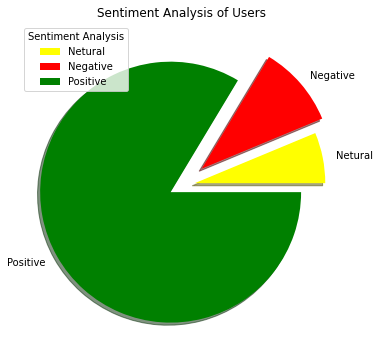

In [68]:
positive=0
negative=0
neutral=0
polarity=0

#token = ''
Neutral_review=[]
Negative_review=[]
Positive_review=[]

for i in review:
    analysis = TextBlob(i)

    polarity += analysis.sentiment.polarity

    if (analysis.sentiment.polarity==0.00):
        neutral += 1
        Neutral_review.append(i)
    elif (analysis.sentiment.polarity<0.00):
        negative += 1
        Negative_review.append(i)
    elif (analysis.sentiment.polarity>0.00):
        positive += 1
        Positive_review.append(i)
    tdata = str(analysis)
    token += ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|RT"," ",tdata).split())
    


if(polarity==0):
    print("Neutral")
elif(polarity<0.00):
    print("Negative")
elif(polarity>0.00):
    print("Positive")


sizes = [neutral,negative,positive]
label = ['Netural' , 'Negative','Positive']
fig = plt.figure(figsize=(6,6))
newexplode = [0.1,0.2,0.1]
newcolor = ['yellow','red','green']
plt.pie(sizes,labels=label,explode=newexplode,colors=newcolor,shadow=True)

plt.title("Sentiment Analysis of Users")
plt.legend(title= "Sentiment Analysis")
plt.show()




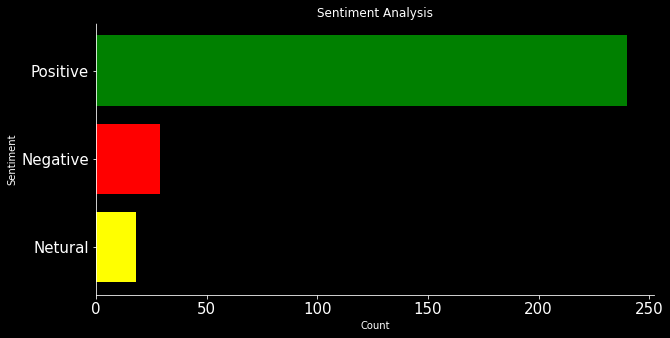

In [71]:
fig = plt.figure(figsize =(10, 5))
csfont = {'fontname':'Times New Roman'}

plt.title("Sentiment Analysis",color='White',**csfont)
plt.xlabel("Count",color='White',**csfont)
plt.ylabel("Sentiment",color='White',**csfont)

ax = plt.gca()
ax.set_facecolor('black')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white', which='both')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.patch.set_facecolor('black')

plt.barh(label,sizes,color=newcolor)

plt.show()


In [ ]:
word_freq = {key: token.count(key) for key in token.split()}
print("The words frequency : " + str(word_freq)) 

In [ ]:
x = dict(sorted(word_freq.items(), key=lambda item: item[1],reverse=True))
print(x)

In [106]:
connecting_words=['V','C','O','N','be','us','go','with','for','to','To','In','there','this','they','the','and','a','in','of','is','Is','t','i','n','r','s','u','m','an','he','on','it','or','I','at','ti','as','A','x','me','wi','ur','all','so','for','am','of']

for word in list(x):
    if(word in connecting_words):
        del x[word]

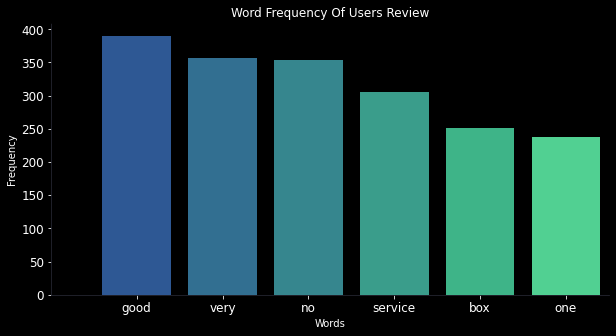

In [122]:
fig = plt.figure(figsize =(10, 5))
csfont = {'fontname':'Times New Roman'}

plt.title("Word Frequency Of Users Review",color='white',**csfont)
plt.xlabel("Words",color='white',**csfont)
plt.ylabel("Frequency",color='White',**csfont)

ax = plt.gca()
ax.set_facecolor('black')
ax.spines['bottom'].set_color('#262833')
ax.spines['left'].set_color('#262833')
ax.tick_params(colors='white', which='both')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.patch.set_facecolor('black')

newcolor = ['#2E5894','#326F91','#36868E','#3A9D8B','#3EB488','#51D092']
plt.xlim(-1,5.5)
plt.bar(*zip(*x.items()),color=newcolor)
plt.show()

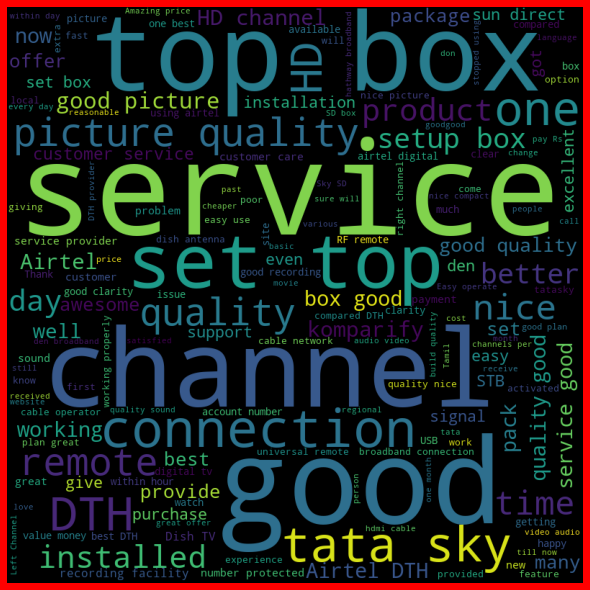

In [126]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(token)

plt.figure(figsize = (8, 8), facecolor = "red") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [127]:
for i in Negative_review:
  print(i)


The box is basic with a USB slot for plugging in a pen drive for recording live TV. However, the recording is in an encrypted format that cannot be played on any other device. the nifty feature is that the remote is universal, meaning you can teach it your TV's remote signals and use one remote for both the TV and the STB.



looks small, weightless and I am provided by a very gud package



I am using Airtel DTH connection from past 3 year. i am statified with their service and cost.



I bought Standard definition connection.
The installation guy told that the building wire is bad, so we had to get a temporary wire though balcony. The installation guy was bad and was not ready to do clipping/wall mounting for wire. The total wire used for 38 m. Since 10 m is free, Need to pay 28 m * 12 which is 330 rs extra.




Tatasky leads all other DTHs it has verygood offers and works at typical conditins as well..



I am very sad when we are seeing the cable network now I think to install dis